In [1]:
!pip install opencv-contrib-python

In [2]:
!pip install imutils

In [3]:
import cv2
import time
import imutils #resizing library

In [4]:
cam = cv2.VideoCapture(0)   #initializae the camera
time.sleep(1)               # 1 second dealy
firstFrame=None             # initializes there is not object
area = 500                  #threshold

while(True):
    _,img = cam.read()                    # read the frame from the camera
    text = "Normal"                       # initializes the text as Normal
    img=imutils.resize(img, width=area)   # resize the image
    grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)              # converts color to gray
    gaussianImg = cv2.GaussianBlur(grayImg, (21,21) , 0)        # smooth the image
    
    if firstFrame is None:
        firstFrame = gaussianImg          # saving the first preprocessed image
        continue
    
    imgDiff = cv2.absdiff(firstFrame, gaussianImg)              # subtracts current from from initial one
    
    # after the difference, the threshold transform the diff into black hole
    threshImg = cv2.threshold(imgDiff, 25, 255, cv2.THRESH_BINARY)[1]
    
    # dialation fulls the small remaining holes
    threshImg = cv2.dilate(threshImg, None, iterations=2)       # removes holes in the image
    
    # Contours can be explained simply as a curve joining all the continuous points (along the boundary), 
    # having same color or intensity. 
    # The contours are a useful tool for shape analysis and object detection and recognition.
    # covers up the whole moving object as a single area
    cnts = cv2.findContours(threshImg.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    cnts = imutils.grab_contours(cnts)
    for c in cnts:
        if cv2.contourArea(c)<area:
            continue
        (x,y,w,h) = cv2.boundingRect(c)
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0),2)   # color and thickness (0,255,0),2
        text="Moving Object Detected"
    print(text)
    
    # (10,20) text coordinates, font cv2.FONT_HERSHEY_SIMPLEX, font size 0.5, font color (0,0,255),2) 
    cv2.putText(img,text,(10,20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),2) 
    cv2.imshow("cameraFeed",img)
    
    # set the quit keyboard
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break
        
cam.release()
cv2.destroyAllWindows()


Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Normal
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Detected
Moving Object Det

In [5]:
import cv2
cv2.__version__

'4.7.0'

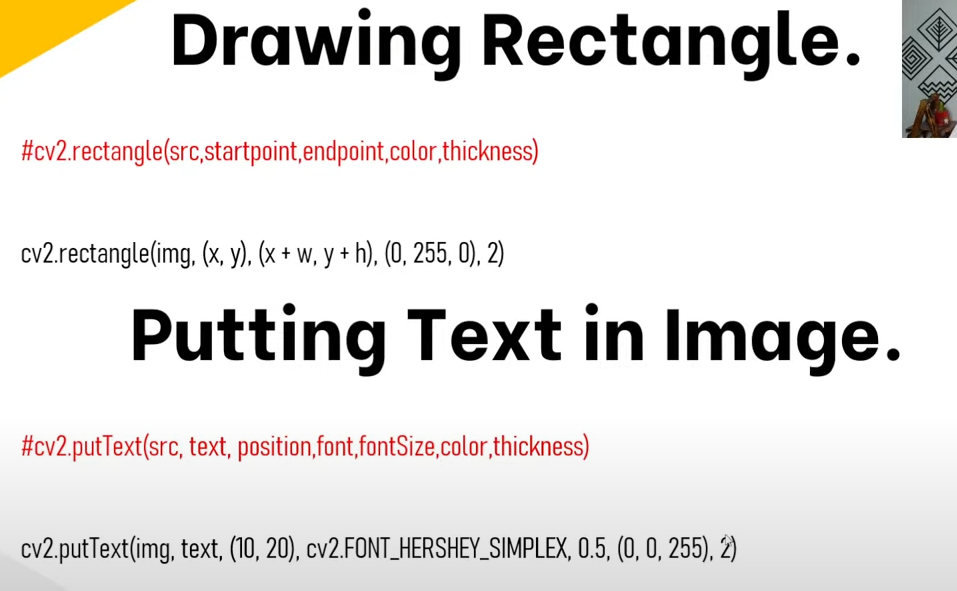

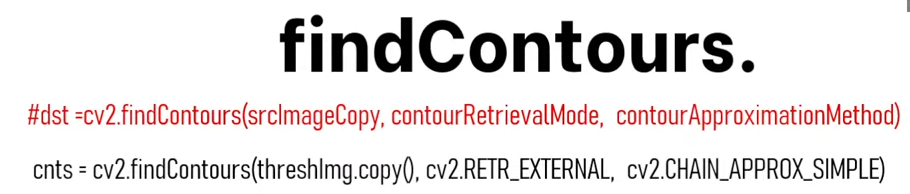

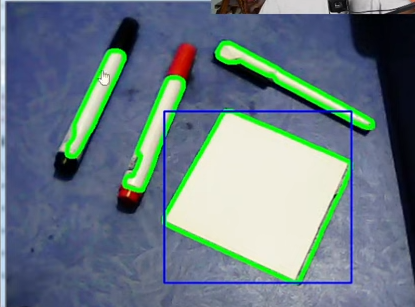